 # Statistical Inference
 the theory, methods, and practice of forming judgments about the parameters of a population and the reliability of statistical relationships, typically o the basis of random sampling

# A population 
set of similar items or events which is of interest for some question or experiments. It is generally difficult or impossible to sample from the entire population so we rely on random sampling techniques to ensure that our sample is a ggod representation of the population

# Applications of Statistical Inference
### Hypothesis Testing: 
How well does the data match some assumed(null) distribution ?
### Point Estimation 
What instance of some distributional class does it match well ?
### Uncertainty Estimation: 
How can we quantift our degree of uncertainty about our estimates ?
### Sensititvity Analysis:
Do our results rely heavily on our distributional assumptions ? 

# infer from beta
The Beta distribution is a probability distribution on probabilities. For example, we can use it to model the probabilities: the Click-Through Rate of your advertisement, the conversion rate of customers actually purchasing on your website, how likely readers will clap for your blog, how likely it is that Trump will win a second term, the 5-year survival chance for women with breast cancer, and so on.

https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af

![title](beta_dist.png)

In [29]:
#The difference between the binomial and the beta is that the former models the number of successes (x), while the latter models the probability (p) of success.
from scipy import stats;
import matplotlib.pyplot as plt
import numpy as np

This function demonstrates the process of statistical inference on a dataset. We first instantiate your beta distribution given the input parameters, we create a histogram of 2,000 samples drawn from that distribution, and then evaluate the PDF for most possible values. The plotting code takes up most of the function and is less important here than the single line needed for inference. To summarize the function, we use a beta distribution to represent our given dataset, and then we infer a Gaussian using the dot fit method. The estimated parameters are denoted with a conventional hat notation. The histogram represents the random samples from the specified beta distribution and the lines are the corresponding PDFs.

In [53]:
def infer_gaussian_from_beta(a, b):
    '''
    takes the alpha (a) and beta (b) parameters from a beta distribution 
    produces a plot with both the original and the inferred
    '''
    
    # plot data
    fig = plt.figure(figsize=(10,4), dpi=160, facecolor='white')
    ax = fig.add_subplot(111)
    beta_dist = stats.beta(a, b) 
    beta_rvs = beta_dist.rvs(size=2000)
    pdf_range = np.linspace(beta_dist.ppf(0.0001), beta_dist.ppf(0.9999),100)
#     print()
    ax.hist(beta_rvs, bins=60, facecolor='royalblue', alpha=0.7, density=1, histtype='stepfilled') 
    ax.plot(pdf_range, beta_dist.pdf(pdf_range), 'darkorange', lw=3, label='Beta')
    
    ## inference 
    mu_hat, sigma_hat = stats.norm.fit(beta_rvs)
    
    # plot inferred pdf
    norm_dist = stats.norm(loc=mu_hat, scale=sigma_hat)
    norm_rvs = norm_dist.rvs(size=1000)
    pdf_range = np.linspace(norm_dist.ppf(0.0001), norm_dist.ppf(0.9999), 100)
    ax.plot(pdf_range, norm_dist.pdf(pdf_range), color='black', linestyle='dashed', lw=3, label='Gaussian')
    ax.set_aspect(1./ ax.get_data_ratio())
    ax.set_xlim((-1, 1.1))
    ax.legend(loc='upper left')
    
    # annotate the axis
    text = r'alpha %s, beta %s' % (a, b) + '\n'
    text += r'$\hat(\mu)$=%s, $\hat{\sigma}$=%s'% (round(mu_hat,2), round(sigma_hat,2))
    ax.annotate(text, xy=(0.01, 0.7), xycoords='axes fraction',
               xytext = (0.02, 0.68), textcoords='axes fraction',
               bbox=dict(boxstyle='round', fc='0.8'))
    
    return norm_dist, beta_dist

In [54]:
# stats.beta.rvs()

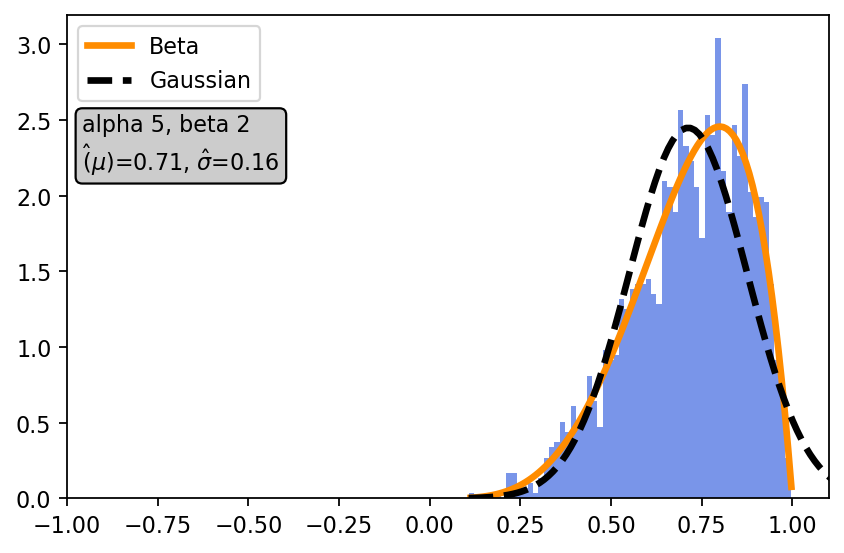

In [61]:
norm_dist, beta_dist = infer_gaussian_from_beta(5,2)

# For example
For example, what is the probability that more than 90 percent of processors are being used at any one time?

We can answer this using the CDF as shown. We see that the probabilities from the assumed and actual distributions are close. Given a reasonable fit, we can make statements like; on average, there is a 12 percent probability that more than 90 percent of processors are being allocated. Let's first see what happens when our assumed distribution is no longer appropriate for the given data.

### Example
Assignment Example
In class we talked about reasons why grade distributions might be well suited to be described as a Beta
distribution. Let’s say that we are given a set of student grades for a single exam and we find that it is best
fit by a Beta distribution: X ∼ Beta(a = 8.28,b = 3.16). What is the probability that a student is below the
mean (i.e. expectation)?
The answer to this question requires two steps. First calculate the mean of the distribution, then calculate the
probability that the random variable takes on a value less than the expectation.
E[X] = a
a+b
=
8.28
8.28+3.16
≈ 0.7238
Now we need to calculate P(X < E[X]). That is exactly the CDF of X evaluated at E[X]. We don’t have
a formula for the CDF of a Beta distribution but all modern programming languages will have a Beta CDF
function. In JavaScript we can execute: jStat.beta.cdf which takes the x parameter first followed by the alpha
and beta parameters of your Beta distribution.
P(X < E[X]) = FX (0.7238) = jStat.beta.cdf(0.7238, 8.28, 3.16)
≈ 0.46


In [60]:
## what is the propability that more than 90 % of processors are being used at any one time?
print('Estimated Probability {}'.format(round(1-norm_dist.cdf(0.90), 3)))
print('True Probability: {}'.format(round(1-beta_dist.cdf(0.90),3)))

Estimated Probability 0.085
True Probability: 0.062


We are going to work with the following example for the remainder of this lesson. 
* Visitors to the Avail website or randomly sent version A or version B of the website. Let's assume that version B has new marketing scheme for getting a user to click "Subscribe", and version A is the default version. 
    * In order to investigate whether version B has a greater impact on purchase decisions, we will track the number of visitors to each version and keep track of the proportion that convert to becoming subscribers. Recall the basic process behind hypothesis testing. If we decide to use a binomial test, for example, then the procedure would look like the steps enumerated here. From a scientific thinking perspective, we're trying to disprove all other possible explanations before accepting that website B is more or less effective than website A. It is important to remember that we decide on a test and the level of significance before collecting the data. In the context of modern data science, collecting the data could refer to the process of loading it into Pandas because data is often being accumulated in some form for most organizations. 

# Hypothesis testing
### 1.Pose your question
    * Do visitors to sites A and B convert ( i.e. become subscribers) at different rates?
### 2. Specify a null $H_{0}$ and alternative ${H_{1}}$ hypotheses
  * $H_{0}$ The conversion rate is the same between A and B
  * $H_{1}$ THe conversion rate is different sites A and B
 ### 3. Choose a specific hypothesies test a nd level of significance
  *  Binomial Test, $\alpha$ 0.05
 ### 4.Collect data
  * Track visitors to site a specified period of time, randomly sending each to either A or B
 ### 5. Run the test
  * Calculate the test statistic and determine a p-value
  ### 6. Evaluate the results
  * You will fail to reject the null hypothesis or you will reject it favor of the alternative

In [65]:
def simulate_data(n, p):
    '''The propability of success in a signle trial follows a Brtnoulli distribution.
       We can simulate visitors to the site by running repeated Bernoulli trials
    ''' 
    results = stats.bernoulli(p).rvs(n)
    converts = np.sum(results)
    print('We observed {} conversions out of {} visitors'.format(converts, n))
    return (results)
p_a = 0.12
p_b = 0.20 

np.random.seed(42)
results = simulate_data(100, p_b)
print(results)

We observed 18 conversions out of 100 visitors
[0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


In [67]:
# running binomial test
baseline_probability = p_a
p_value = stats.binom_test(np.sum(results), n=results.size, p=baseline_probability)
print('binomial test p-value: {}'.format(round(p_value, 4)))
print('If p < 0.05 We will reject the null hypothesis, that the conversion rate is  the same as historical conv rate')

binomial test p-value: 0.0878
If p < 0.05 We will reject the null hypothesis, that the conversion rate is  the same as historical conv rate


 We can also think of the AB test from a generative perspective, that is, samples are generated by repeated Bernoulli trials, and these follow a binomial distribution. So we can specify the baseline as follows; let p be the long-term conversion rate. In this case, it is the rate observed from site A, and let the parameter n be the number of samples in our experimen

In [70]:
expected_dist = stats.binom(n=results.size, p=p_a)
mu = expected_dist.mean()
sd = expected_dist.std()
print('The expected distribution the site is mu = {} and'.format(mu, round(sd, 3)))

The expected distribution the site is mu = 12.0


 If the number of visitors increases beyond a few thousand, it becomes reasonable to use a normal distribution to approximate the estimated proportion. The test statistic in this case is a z-score shown by the formula above. The numerator is the difference between our estimated conversion rate and the baseline. The one-half is additionally subtracted as a continuity correction.

In [71]:
expected_dist = stats.binom(n=results.size, p=p_a)
p0 = expected_dist.mean()
sd = expected_dist.std()
z = (np.sum(results) - 0.5 - p0) / sd
pvalue = 2* (1 - stats.norm.cdf(z))
print('normal approximation p-value: {}'.format(round(p_value,3)))

normal approximation p-value: 0.088


# Permutation test
The distribution of the test statistic under the null hypothesis is obtained by calculating a very large number of possible values

In [74]:
nsamples = 100000
n = results.size
p = p_a
print('n={}, p={}'.format(n, p))
xs = np.random.binomial(n, p, nsamples)
p_value = 2*np.sum(xs>=np.sum(results)) / xs.size
print('simulation p-value {}'.format(round(p_value, 3)))

n=100, p=0.12
simulation p-value 0.104


# Maximum likelihood estimation 
When business desicions are made on the basis of particular estimate then the context 
provided by the boostrp method provides an additional source of information to help make those desicions

In [79]:
bs_samples = np.random.choice(results, (nsamples, len(results)), replace=True)
bs_ps = np.mean(bs_samples, axis=1)
bs_ps.sort()

print('Maximum Likelihood Estimate: %s ' % (np.sum(results)/ float(len(results))))
print('Bootsrtap CI: (%.4f, %.4f)' % (bs_ps[int(0.025*nsamples)], bs_ps[int(0.975*nsamples)]))

Maximum Likelihood Estimate: 0.18 
Bootsrtap CI: (0.1100, 0.2600)


# Bernoulli Random Variable
A Bernoulli random variable is the simplest kind of random variable. It can take on two values,
1 and 0. It takes on a 1 if an experiment with probability p resulted in success and a 0 otherwise.
Some example uses include a coin flip, a random binary digit, whether a disk drive crashed, and
whether someone likes a Netflix movie.
\begin{equation}
    f(k;p) =
    \left\{
        \begin{array}{cc}
                p & \mathrm{if\ } k=1 \\
                1-p & \mathrm{if\ } k=0 \\
        \end{array} 
    \right.
\end{equation}

# Binomial Random Variable
A binomial random variable is random variable that represents the number of successes in n
successive independent trials of a Bernoulli experiment. Some example uses include the number
of heads in n coin flips, the number of disk drives that crashed in a cluster of 1000 computers, and
the number of advertisements that are clicked when 40,000 are served.
If X is a Binomial random variable, we denote this X ∼ Bin(n, p), where p is the probability of
success in a given trial. A binomial random variable has the following properties:
$$ P(A) = \sum P(\{ (e_1,...,e_N) \})  =  {{N}\choose{k}} \cdot p^kq^{N-k}$$

In [92]:
def bayes_one_sample_proportaons(p_a, p_b, n=100):
    '''
    use the conjugate to estimate the posterior
    '''
    fig = plt.figure(figsize=(10,4), dpi = 150, facecolor='white')
    ax = fig.add_subplot(111)
    np.random.seed(42)
    results = simulate_data(n, p_b)
    print(results)
    
    expected_dis = stats.binom(n=results.size, p=p_a)
    mu = expected_dist.mean()
    sd = expected_dist.std()
    print('Given the baseline we expect on a average {} conversions'.format(int(mu)))
    p_value = stats.binom_test(np.sum(results), n=results.size, p=p_a)
    print('binomial test p-value: {}'.format(round(p_value, 4)))
    
    converts = np.sum(results)
    a, b = 1, 1
    prior = stats.beta(a, b)
    post = stats.beta(converts + a, n - converts + b)
    ci = post.interval(0.95)
    map_ = (converts+a-1.0) / (n+a+b-2.0)
    
    xs = np.linspace(0,1,n)
    ax.plot(prior.pdf(xs), label='Prior')
    ax.plot(post.pdf(xs), label='Posterior')
    
    maxval = (0.05*post.pdf(xs).max()) + post.pdf(xs).max()
    linerange = np.linspace(0, maxval, 100)
    ci_range = np.linspace(ci[0],ci[1], 100)
    ax.plot(ci_range*n, [0.05*maxval] *100, c='black', linewidth=2, label='95% CI')
    ax.plot([n*p_a]*100, linerange, c='black', linestyle='solid', linewidth=5, alpha=0.5, label=r'$p_{a}$')
    ax.plot([n*p_a]*100, linerange, c='gold', linestyle='solid', linewidth=5, alpha=0.5, label=r'$p_{b}$')
    ax.plot([n*map_]*100, linerange, c='royalblue', linestyle='dashed', alpha=0.9, label=r'$\hat{p_{b}}$') 
    ax.set_ylim((0, maxval))
    ax.legend()

We observed 18 conversions out of 100 visitors
[0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
Given the baseline we expect on a average 12 conversions
binomial test p-value: 0.0878


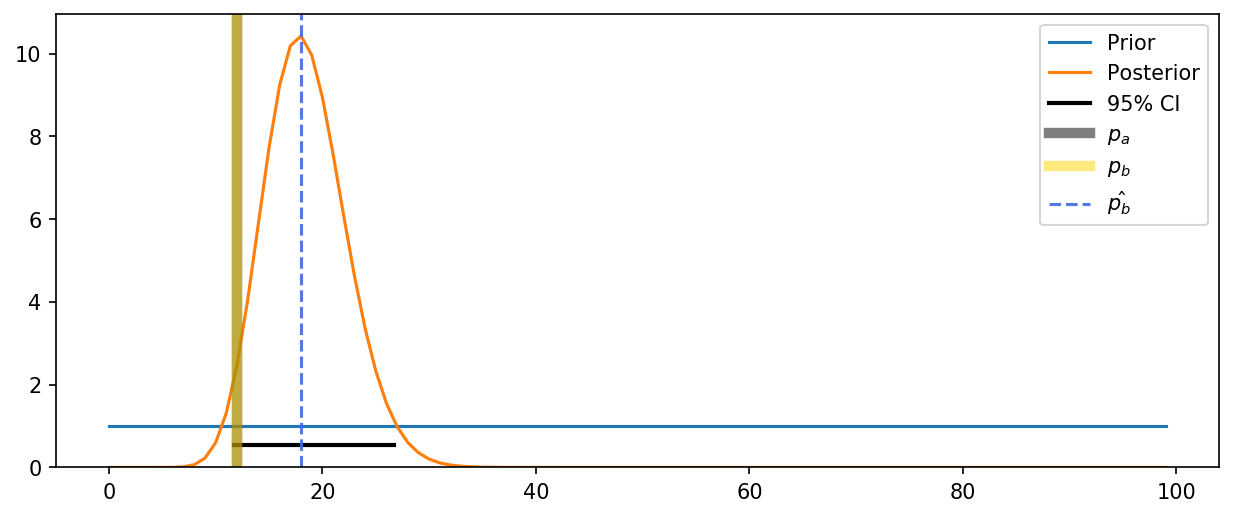

In [93]:
p_a = 0.12
p_b = 0.20 
bayes_one_sample_proportaons(p_a, p_b, n=100)

## Two-sample independent t-test
In this example we are interested in comparing the amount of time elapsed between a client request and stream availability for the company AAVAIL’s streaming servers. Specifically we want to compare our locally hosted servers to a cloud service in terms of speed. The data are arrival times (in seconds) for a stream, meaning the time it takes from submission to receive a link with the modified version of the stream.

#### 1. Pose a question
<em> Is it faster, on average, to process streams for viewing on a cloud service compared to our locally hosted servers?</em>
#### 2.Find the relevant population - 
<em> The population consits of all possible streams</em>
#### 3. Null Hypothesis 
<em> There is no difference, on average, between local and hosted services for stream processing time location after I submit my ride request</em>
#### 4.Select the test and the significance level, two-sample independent t-test 
<em> $\alpha$ = 0.05

In [94]:
local_arrivals = np.array([3.99, 4.15, 6.88, 4.53, 5.65, 6.75, 7.13, 2.79, 6.20,
                           3.72, 7.28, 5.23, 4.72, 1.04, 4.25, 4.71, 2.16, 3.46,
                           3.41, 7.98, 0.75, 3.64, 6.25, 6.86, 4.71])
hosted_arrivals = np.array([5.82, 4.83, 7.19, 6.98, 5.82, 5.25, 5.71, 5.59, 
                            7.93, 7.09, 6.37, 6.31, 6.28, 3.12, 6.02, 4.84, 
                            4.16, 6.72, 7.44, 6.28, 7.37, 4.27, 6.15, 4.88, 
                            7.78])

In [97]:
test_statistic, pvalue = stats.ttest_ind(local_arrivals, hosted_arrivals)

In [99]:
pvalue

0.00690302952864854

# P-value is less than 0.05 - * We reject the Null Hypothesis in favor of the alternative that the average times are not the same

# Unequal varicances t-test


In [100]:
test_statistic, p_value = stats.ttest_ind(local_arrivals, hosted_arrivals, equal_var=False)

In [101]:
p_value

0.007347290506472048

There a number of variants on t-tests available through the scipy.stats submodule.

ttest_1samp
Calculate the t-test for the mean of ONE group of scores.
ttest_ind
Calculate the t-test for the means of two independent samples of scores.
ttest_ind_from_stats
t-test for means of two independent samples from descriptive statistics.
ttest_rel
calculate the t-test on two related samples of scores, a and b. (paired t-test)
You should also be aware of the difference one-tailed and two-tailed versions of significance tests.

# One-way Analysis of Variance (ANOVA)

The previous scenarios have been concerned with distinguishing between a sample and a baseline, and between two samples. Suppose you want to distinguish between three or more samples, that is your data fall into three-plus categories and you want to establish whether there is a difference in outcomes based on those categories.

If AAVAIL wanted to run the performance tests from the previous example comparing several cloud providers and several architectures then an ANOVA would be more appropriate here.

In [102]:
import numpy as np
from scipy import stats

local_arrivals = np.array([3.99, 4.15, 7.88, 4.53, 5.65, 6.75, 7.13, 3.79, 6.20,
                           3.72, 7.28, 5.23, 4.72, 2.04, 4.25, 4.71, 3.16, 3.46,
                           3.41, 7.98, 0.75, 3.64, 6.25, 6.86, 4.71])
cloud1_arrivals = np.array([5.82, 4.83, 7.19, 6.98, 5.82, 5.25, 5.71, 5.59, 6.93,
                            7.09, 6.37, 6.31, 6.28, 3.12, 6.02, 4.84, 4.16, 6.72,
                            7.44, 6.28, 6.37, 4.27, 6.15, 4.88, 6.78])
cloud2_arrivals = np.array([5.73, 4.95, 6.96, 6.12, 5.85, 6.74, 5.19, 7.24,
                            6.08, 6.11, 6.11, 7.68, 4.66, 6.12, 5.04, 4.19, 6.46,
                            7.02, 7.28, 6.19, 4.67, 7.15, 4.58, 6.01])
                            

In [111]:
all_arrivals = [local_arrivals, cloud1_arrivals, cloud2_arrivals]
global_mean = np.hstack(all_arrivals).mean()


In [109]:
np.hstack(all_arrivals)

array([3.99, 4.15, 7.88, 4.53, 5.65, 6.75, 7.13, 3.79, 6.2 , 3.72, 7.28,
       5.23, 4.72, 2.04, 4.25, 4.71, 3.16, 3.46, 3.41, 7.98, 0.75, 3.64,
       6.25, 6.86, 4.71, 5.82, 4.83, 7.19, 6.98, 5.82, 5.25, 5.71, 5.59,
       6.93, 7.09, 6.37, 6.31, 6.28, 3.12, 6.02, 4.84, 4.16, 6.72, 7.44,
       6.28, 6.37, 4.27, 6.15, 4.88, 6.78, 5.73, 4.95, 6.96, 6.12, 5.85,
       6.74, 5.19, 7.24, 6.08, 6.11, 6.11, 7.68, 4.66, 6.12, 5.04, 4.19,
       6.46, 7.02, 7.28, 6.19, 4.67, 7.15, 4.58, 6.01])

In [110]:
all_arrivals

[array([3.99, 4.15, 7.88, 4.53, 5.65, 6.75, 7.13, 3.79, 6.2 , 3.72, 7.28,
        5.23, 4.72, 2.04, 4.25, 4.71, 3.16, 3.46, 3.41, 7.98, 0.75, 3.64,
        6.25, 6.86, 4.71]),
 array([5.82, 4.83, 7.19, 6.98, 5.82, 5.25, 5.71, 5.59, 6.93, 7.09, 6.37,
        6.31, 6.28, 3.12, 6.02, 4.84, 4.16, 6.72, 7.44, 6.28, 6.37, 4.27,
        6.15, 4.88, 6.78]),
 array([5.73, 4.95, 6.96, 6.12, 5.85, 6.74, 5.19, 7.24, 6.08, 6.11, 6.11,
        7.68, 4.66, 6.12, 5.04, 4.19, 6.46, 7.02, 7.28, 6.19, 4.67, 7.15,
        4.58, 6.01])]

In [112]:
print("The global mean arrival time is: %s"%np.round(global_mean, decimals=2))

for name, arrivals in zip(['local', 'cloud1', 'cloud2'], all_arrivals):
    print("Mean arrival time for {} is {}".format(name, np.round(arrivals.mean(), decimals=2)))

The global mean arrival time is: 5.59
Mean arrival time for local is 4.89
Mean arrival time for cloud1 is 5.89
Mean arrival time for cloud2 is 6.01


In [118]:
test_statistic, pvalue = stats.f_oneway(*all_arrivals)
print(np.round(pvalue,decimals=4))


0.0082


In this example, it seems likely that there is at least one difference between the groups. When digging deeper to determine which type of compute environment is best, one needs to be mindful of the multiple comparison problem.  